In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
import re, random, os
import json
#import xgboost as xgb

from datetime import datetime, timedelta

from sklearn import tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [7]:
# Load up csvs and merge data

sepsis_mastersheet_clean = pd.read_csv('sepsis_mastersheet_clean.csv')


In [9]:
sepsis_mastersheet_clean

,Age,first_blood_pressure_panel_with_all_children_optional_value,first_oxgyen_saturation_in_arterial_blood_value,first_respiratory_rate_value,first_heart_rate_value,first_body_temperature_value,inrpt_value,anion_gap_value,bicarbonate_value,chloride_value,...,sepsis_risk,Race_ Black,Race_Indian_Native,Race_Asian,Race_AHPI,Race_White,Race_unk_other,Ethnicity_Hispanic or Latino,Gender_female,Language_en
0,41,91,100.0,30,127.0,99.2,1.8,19,13.0,112,...,True,False,False,False,False,False,True,False,True,True
1,63,133,98.0,18,85.0,98.0,1.1,17,16.0,113,...,False,False,False,False,False,False,True,False,False,True
2,71,113,95.0,18,73.0,97.8,1.8,14,19.0,108,...,True,False,False,False,False,False,True,False,False,True
3,48,127,100.0,18,80.0,98.6,1.7,11,24.0,100,...,False,False,False,False,False,False,True,False,True,True
4,76,176,99.0,20,74.0,99.0,1.1,13,17.0,100,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56866,22,168,100.0,18,86.0,97.7,1.1,15,24.0,101,...,False,False,False,False,False,False,True,False,False,True
56867,39,105,98.0,17,76.0,99.6,1.1,15,24.0,101,...,False,False,False,False,False,False,True,False,True,True
56868,62,131,100.0,18,96.0,97.9,1.1,15,24.0,101,...,False,False,False,False,False,False,True,False,True,False
56869,35,147,100.0,20,85.0,97.7,1.1,13,24.0,108,...,False,False,False,False,False,False,True,False,True,True


In [ ]:
# Trying some models

In [11]:
# Train and test split
X = sepsis_mastersheet_clean.drop(columns = 'sepsis_risk')
y = sepsis_mastersheet_clean['sepsis_risk']


In [13]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=0)

In [15]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = rf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.93113351306998


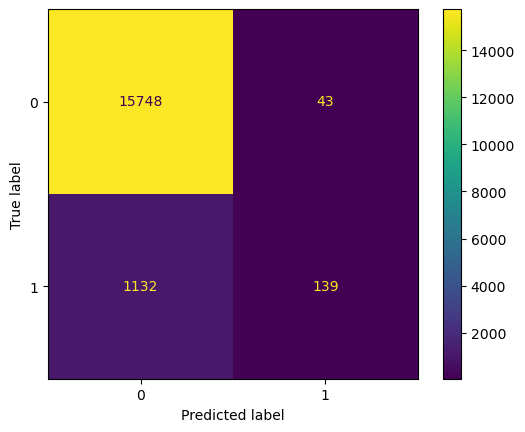

In [23]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
score = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(f"ROC AUC: {score:.4f}")

Accuracy: 0.93113351306998
Precision: 0.7637362637362637
Recall: 0.1093627065302911
ROC AUC: 0.5533


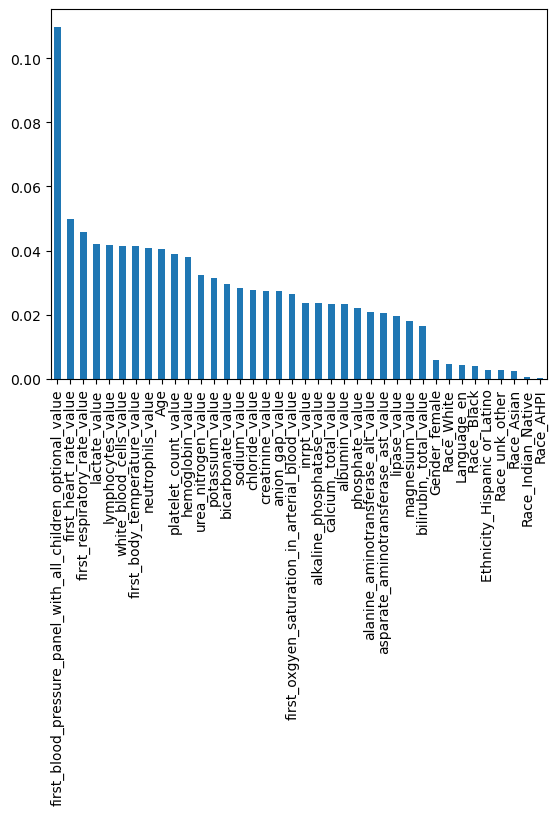

In [27]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [29]:
# XGB 

xgbmodel = xgb.XGBClassifier()
xgbmodel.fit(X_train, y_train)


NameError: name 'xgb' is not defined

In [171]:
# make predictions for test data
y_pred_xgb = xgbmodel.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.93%


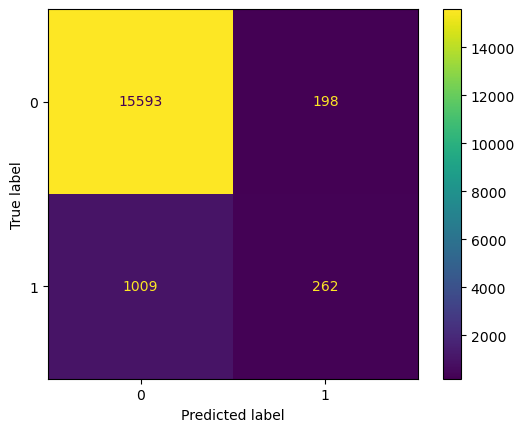

In [173]:
# Create the confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

ConfusionMatrixDisplay(confusion_matrix=xgb_cm).plot();

In [ ]:
# Logistic regression 

In [31]:
LRmodel = LogisticRegression()

# Train the model
LRmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred_lr = LRmodel.predict(X_test)

In [37]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
lr_score = roc_auc_score(y_test, y_pred_lr)
print(f"ROC AUC: {lr_score:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

# Classification Report
class_report = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(class_report)

Accuracy: 92.84%
ROC AUC: 0.5385
Confusion Matrix:
[[15739    52]
 [ 1169   102]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96     15791
        True       0.66      0.08      0.14      1271

    accuracy                           0.93     17062
   macro avg       0.80      0.54      0.55     17062
weighted avg       0.91      0.93      0.90     17062



In [ ]:
# Initial data cleaning 20/08

In [34]:
ML_merge = pd.merge(ML_merge, antibiotics, how="left", on="enc_id")

In [111]:
sepsis_mastersheet_clean.to_csv('sepsis_mastersheet_clean.csv', sep=',', index=False, encoding='utf-8')

In [39]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


In [97]:
sepsis_mastersheet = pd.read_csv('sepsis_mastersheet.csv')

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_57445/3994585049.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,157,158,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  sepsis_mastersheet = pd.read_csv('sepsis_mastersheet.csv')


In [121]:
sepsis_mastersheet.dtypes

enc_arrival                                                                   object
Age                                                                            int64
Gender                                                                        object
Race                                                                          object
Ethnicity                                                                     object
Language                                                                      object
first_blood_pressure_panel_with_all_children_optional_value                  float64
first_oxgyen_saturation_in_arterial_blood_value                              float64
first_respiratory_rate_value                                                 float64
first_heart_rate_value                                                       float64
first_body_temperature_value                                                 float64
newest_blood_pressure_panel_with_all_children_optional_value     

In [117]:
list(sepsis_mastersheet.columns)

['enc_arrival',
 'Age',
 'Gender',
 'Race',
 'Ethnicity',
 'Language',
 'first_blood_pressure_panel_with_all_children_optional_value',
 'first_oxgyen_saturation_in_arterial_blood_value',
 'first_respiratory_rate_value',
 'first_heart_rate_value',
 'first_body_temperature_value',
 'newest_blood_pressure_panel_with_all_children_optional_value',
 'newest_oxgyen_saturation_in_arterial_blood_value',
 'newest_respiratory_rate_value',
 'newest_heart_rate_value',
 'newest_body_temperature_value',
 'highest_blood_pressure_panel_with_all_children_optional_value',
 'highest_oxgyen_saturation_in_arterial_blood_value',
 'highest_respiratory_rate_value',
 'highest_heart_rate_value',
 'highest_body_temperature_value',
 'lowest_blood_pressure_panel_with_all_children_optional_value',
 'lowest_oxgyen_saturation_in_arterial_blood_value',
 'lowest_respiratory_rate_value',
 'lowest_heart_rate_value',
 'lowest_body_temperature_value',
 'inrpt_value',
 'anion_gap_value',
 'bicarbonate_value',
 'chloride_valu

In [103]:
# Only keep the first obs 
#more_columns_to_drop = sepsis_mastersheet.columns[sepsis_mastersheet.columns.str.contains('newest')]
#more_columns_to_drop2 = sepsis_mastersheet.columns[sepsis_mastersheet.columns.str.contains('highest')]
#more_columns_to_drop3 = sepsis_mastersheet.columns[sepsis_mastersheet.columns.str.contains('lowest')]
more_columns_to_drop = sepsis_mastersheet.columns[sepsis_mastersheet.columns.str.contains('DT')]
more_columns_to_drop1 = sepsis_mastersheet.columns[sepsis_mastersheet.columns.str.contains('display')]


In [105]:
more_columns_to_drop = more_columns_to_drop.append(more_columns_to_drop1)

In [115]:
sepsis_mastersheet = sepsis_mastersheet.drop(columns = more_columns_to_drop)

In [155]:
sepsis_mastersheet = sepsis_mastersheet.drop(columns = 'c-reactive_protein_value')

In [107]:
# Process dates

sepsis_mastersheet.enc_start_time = pd.to_datetime(sepsis_mastersheet.enc_start_time, utc = True)
sepsis_mastersheet.enc_end_time = pd.to_datetime(sepsis_mastersheet.enc_end_time, utc = True)
sepsis_mastersheet.icu_start_time = pd.to_datetime(sepsis_mastersheet.icu_start_time, utc = True)
sepsis_mastersheet.icu_end_time = pd.to_datetime(sepsis_mastersheet.icu_end_time, utc = True)
sepsis_mastersheet.antibiotic_dispense_time = pd.to_datetime(sepsis_mastersheet.antibiotic_dispense_time, utc = True)

In [109]:
# Time to abx, ICU

sepsis_mastersheet['Time_to_ICU'] = sepsis_mastersheet['icu_start_time'] - sepsis_mastersheet['enc_start_time']
sepsis_mastersheet['Time_to_Abx'] = sepsis_mastersheet['antibiotic_dispense_time'] - sepsis_mastersheet['enc_start_time']

In [111]:
# Ditch unnecessary rows, one hot encoding 
drop_again = [
'enc_id',
 'enc_start_time',
 'enc_end_time',
 'enc_LOS',
 'enc_disp',
 'adm_type',
 'first_blood_pressure_panel_with_all_children_optional_datetime',
 'first_oxgyen_saturation_in_arterial_blood_datetime',
 'first_respiratory_rate_datetime',
 'first_heart_rate_datetime',
 'first_body_temperature_datetime',
 'newest_blood_pressure_panel_with_all_children_optional_datetime',
 'newest_oxgyen_saturation_in_arterial_blood_datetime',
 'newest_respiratory_rate_datetime',
 'newest_heart_rate_datetime',
 'newest_body_temperature_datetime',
 'highest_blood_pressure_panel_with_all_children_optional_datetime',
 'highest_oxgyen_saturation_in_arterial_blood_datetime',
 'highest_respiratory_rate_datetime',
 'highest_heart_rate_datetime',
 'highest_body_temperature_datetime',
 'lowest_blood_pressure_panel_with_all_children_optional_datetime',
 'lowest_oxgyen_saturation_in_arterial_blood_datetime',
 'lowest_respiratory_rate_datetime',
 'lowest_heart_rate_datetime',
 'lowest_body_temperature_datetime',
 'creatine_kinase,_mb_isoenzyme_value',
 'bilirubin,_direct_value',
 'bilirubin,_indirect_value', 
 'troponin_t_value',
 'patient_id',
 'Birthdate',
 'adm_id_y', 
 'icu_id', 
 'final_LOS', 
 'final_source', 
 'discharge_outcome',
 'death', 
 'adm_id_x', 
 'adm_start_time', 
 'adm_end_time', 
 'adm_LOS', 
 'adm_source', 
 'adm_disp', 
 'enc_start_time_UTC']

sepsis_mastersheet = sepsis_mastersheet.drop(columns = drop_again) 

In [157]:
# Manage NAs
# How many NA values in each column
nan_counts = sepsis_mastersheet.isna().sum()
print(nan_counts)

enc_arrival                                                          0
Age                                                                  0
Gender                                                               0
Race                                                                 0
Ethnicity                                                            0
Language                                                             0
first_blood_pressure_panel_with_all_children_optional_value          0
first_oxgyen_saturation_in_arterial_blood_value                      0
first_respiratory_rate_value                                         0
first_heart_rate_value                                               0
first_body_temperature_value                                         0
newest_blood_pressure_panel_with_all_children_optional_value         0
newest_oxgyen_saturation_in_arterial_blood_value                     0
newest_respiratory_rate_value                                        0
newest

In [143]:
make_median = [
 'first_blood_pressure_panel_with_all_children_optional_value',
 'first_oxgyen_saturation_in_arterial_blood_value',
 'first_respiratory_rate_value',
 'first_heart_rate_value',
 'first_body_temperature_value',
 'newest_blood_pressure_panel_with_all_children_optional_value',
 'newest_oxgyen_saturation_in_arterial_blood_value',
 'newest_respiratory_rate_value',
 'newest_heart_rate_value',
 'newest_body_temperature_value',
 'highest_blood_pressure_panel_with_all_children_optional_value',
 'highest_oxgyen_saturation_in_arterial_blood_value',
 'highest_respiratory_rate_value',
 'highest_heart_rate_value',
 'highest_body_temperature_value',
 'lowest_blood_pressure_panel_with_all_children_optional_value',
 'lowest_oxgyen_saturation_in_arterial_blood_value',
 'lowest_respiratory_rate_value',
 'lowest_heart_rate_value',
 'lowest_body_temperature_value',
 'inrpt_value',
 'anion_gap_value',
 'bicarbonate_value',
 'chloride_value',
 'creatinine_value',
 'potassium_value',
 'sodium_value',
 'urea_nitrogen_value',
 'hemoglobin_value',
 'lymphocytes_value',
 'neutrophils_value',
 'platelet_count_value',
 'white_blood_cells_value',
 'alanine_aminotransferase_alt_value',
 'albumin_value',
 'alkaline_phosphatase_value',
 'asparate_aminotransferase_ast_value',
 'bilirubin,_total_value',
 'lipase_value',
 'lactate_value',
 'magnesium_value',
 'calcium,_total_value',
 'phosphate_value',
]

In [ ]:
sepsis_mastersheet['Race'].value_counts()

In [ ]:
sepsis_mastersheet['Race'].replace('unknown', 'Unknown/other', inplace=True)
sepsis_mastersheet['Race'].replace('other', 'Unknown/other', inplace=True)
sepsis_mastersheet['Race'].replace('asked but unknown', 'Unknown/other', inplace=True)
sepsis_mastersheet['Race'].replace('Black or African American', 'Black/AfricanAmerican', inplace=True)
sepsis_mastersheet['Race'].replace('Native Hawaiian or Other Pacific Islander', 'Unknown/other', inplace=True)

In [141]:
sepsis_mastersheet['enc_arrival'].value_counts()

enc_arrival
AMBULANCE             19621
WALK IN               19092
EMERGENCY ROOM        13541
PHYSICIAN REFERRAL     4075
UNKNOWN                 542
Name: count, dtype: int64

In [ ]:
sepsis_mastersheet['enc_arrival'].replace('WALK-IN/SELF REFERRAL', 'WALK IN', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('CLINIC REFERRAL', 'PHYSICIAN REFERRAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('TRANSFER FROM SKILLED NURSING FACILITY', 'AMBULANCE', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('HELICOPTER', 'AMBULANCE', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('AMBULATORY SURGERY TRANSFER', 'PHYSICIAN REFERRAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('OTHER', 'UNKNOWN', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('PROCEDURE SITE', 'TRANSFER FROM HOSPITAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('INFORMATION NOT AVAILABLE', 'UNKNOWN', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('INTERNAL TRANSFER TO OR FROM PSYCH', 'TRANSFER FROM HOSPITAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('PACU', 'TRANSFER FROM HOSPITAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('TRANSFER FROM HOSPITAL', 'PHYSICIAN REFERRAL', inplace=True)

In [71]:
sepsis_mastersheet = sepsis_mastersheet.drop(columns = 'patient_id') 

In [145]:
def fill_in_NA(column_name_list, dataframe):
    for name in column_name_list:
        dataframe[name].fillna(dataframe[name].median(), inplace=True)
    return dataframe

In [ ]:
sepsis_mastersheet = fill_in_NA(make_median, sepsis_mastersheet)

In [179]:
# Export second version of cleaned mastersheet
sepsis_mastersheet_clean_2.to_csv('sepsis_mastersheet2.csv', sep=',', index=False, encoding='utf-8')

In [167]:
sepsis_mastersheet_clean_2 = pd.get_dummies(sepsis_mastersheet, columns=['Language', 'Gender', 'Race', 'Ethnicity', 'enc_arrival'])


In [173]:
sepsis_mastersheet_clean_2 = sepsis_mastersheet_clean_2.drop(columns = ['Gender_male', 'Language_Unknown language', 'Ethnicity_Not Hispanic or Latino', 'Ethnicity_Unknown ethnicity']) 

In [175]:
sepsis_mastersheet_clean_2

,Age,first_blood_pressure_panel_with_all_children_optional_value,first_oxgyen_saturation_in_arterial_blood_value,first_respiratory_rate_value,first_heart_rate_value,first_body_temperature_value,newest_blood_pressure_panel_with_all_children_optional_value,newest_oxgyen_saturation_in_arterial_blood_value,newest_respiratory_rate_value,newest_heart_rate_value,newest_body_temperature_value,highest_blood_pressure_panel_with_all_children_optional_value,highest_oxgyen_saturation_in_arterial_blood_value,highest_respiratory_rate_value,highest_heart_rate_value,highest_body_temperature_value,lowest_blood_pressure_panel_with_all_children_optional_value,lowest_oxgyen_saturation_in_arterial_blood_value,lowest_respiratory_rate_value,lowest_heart_rate_value,lowest_body_temperature_value,inrpt_value,anion_gap_value,bicarbonate_value,chloride_value,creatinine_value,potassium_value,sodium_value,urea_nitrogen_value,hemoglobin_value,lymphocytes_value,neutrophils_value,platelet_count_value,white_blood_cells_value,alanine_aminotransferase_alt_value,albumin_value,alkaline_phosphatase_value,asparate_aminotransferase_ast_value,"bilirubin,_total_value",lipase_value,lactate_value,magnesium_value,"calcium,_total_value",phosphate_value,icu_start_time,icu_end_time,sepsis_risk,LqSOFA_score,antibiotic_dispense_time,Time_to_ICU,Time_to_Abx,Language_en,Gender_female,Race_ Black or African American,Race_American Indian or Alaska Native,Race_Asian,Race_Unknown/other,Race_White,Ethnicity_Hispanic or Latino,enc_arrival_AMBULANCE,enc_arrival_EMERGENCY ROOM,enc_arrival_PHYSICIAN REFERRAL,enc_arrival_UNKNOWN,enc_arrival_WALK IN
0,31,138.0,100.0,18.0,124.0,98.3,140.0,96.0,16.0,122.0,98.5,140.0,100.0,18.0,137.0,98.5,122.0,96.0,16.0,108.0,98.3,1.1,20.0,34.0,78.0,1.1,2.9,132.0,12.0,13.0,25.7,60.6,150.0,5.4,21.0,3.9,89.0,28.0,0.5,30.0,1.6,1.7,9.3,1.8,NaT,NaT,False,0,NaT,NaT,NaT,True,True,False,False,False,False,True,False,False,False,True,False,False
1,69,118.0,97.0,18.0,80.0,98.4,137.0,100.0,16.0,82.0,98.0,137.0,100.0,19.0,88.0,98.9,118.0,97.0,16.0,80.0,98.0,1.1,15.0,24.0,105.0,0.4,3.1,144.0,9.0,8.0,20.2,61.5,260.0,3.2,21.0,3.2,53.0,14.0,0.5,7.0,1.3,2.0,9.2,3.5,NaT,NaT,False,0,2206-12-03 04:06:00+00:00,NaT,-1 days +20:36:00,True,True,True,False,False,False,False,False,False,False,True,False,False
2,32,118.0,98.0,16.0,88.0,97.9,130.0,100.0,18.0,94.0,98.0,130.0,100.0,18.0,97.0,98.0,118.0,98.0,16.0,88.0,97.9,1.1,16.0,25.0,98.0,0.9,4.3,135.0,20.0,14.5,10.2,81.9,320.0,14.3,21.0,3.9,89.0,28.0,0.5,30.0,1.2,2.2,10.1,3.2,NaT,NaT,False,0,2152-05-20 03:35:00+00:00,NaT,-1 days +20:27:00,True,False,False,False,False,False,True,False,False,True,False,False,False
3,54,173.0,100.0,18.0,127.0,96.0,90.0,99.0,18.0,90.0,98.3,173.0,100.0,18.0,127.0,98.7,90.0,97.0,16.0,74.0,96.0,1.1,17.0,22.0,101.0,1.0,3.5,140.0,8.0,8.4,11.3,81.7,341.0,10.0,5.0,3.3,99.0,9.0,0.3,20.0,0.8,2.0,9.2,3.5,NaT,NaT,False,1,2150-05-10 03:50:00+00:00,NaT,-1 days +20:27:00,True,True,False,False,False,False,True,False,False,False,True,False,False
4,45,149.0,100.0,20.0,101.0,98.2,115.0,97.0,18.0,82.0,98.0,149.0,100.0,20.0,101.0,98.2,115.0,97.0,18.0,82.0,98.0,1.1,14.0,29.0,102.0,0.7,4.2,141.0,7.0,13.5,50.5,39.0,156.0,3.5,21.0,3.9,89.0,28.0,0.5,30.0,1.6,1.8,9.4,4.2,NaT,NaT,False,0,NaT,NaT,NaT,True,True,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56866,51,146.0,100.0,16.0,96.0,98.1,147.0,99.0,16.0,72.0,98.4,147.0,100.0,18.0,96.0,98.5,113.0,98.0,16.0,70.0,97.7,1.1,16.0,21.0,102.0,0.9,3.9,135.0,11.0,12.7,20.4,71.6,188.0,5.3,21.0,3.9,89.0,28.0,0.5,30.0,1.6,2.0,9.2,3.5,NaT,NaT,False,0,NaT,NaT,NaT,True,False,False,False,False,False,True,False,False,False,False,False,True
56867,19,131.0,100.0,16.0,66.0,97.9,111.0,100.0,16.0,63.0,98.0,131.0,100.0,20.0,66.0,98.